# 「Python による経済・経営分析のための実践的データサイエンス」第4章 (pp.97-116)

4.1 Python による基礎的な統計分析 (p.97)

In [1]:
import pandas as pd
import io

#データを読み込む
input_data = pd.read_csv("carprice.csv")

In [2]:
input_data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


4.2 型や特性を把握する (p.99)

In [3]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

4.3 平均、分散、標準偏差を求める

In [4]:
#データの概要を確認する
input_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
#価格の平均をもとめる
print(input_data.price.mean())
#価格のメディアン値をもとめる
print(input_data.price.median())
#価格の分散をもとめる
print(input_data.price.var())
#価格の標準偏差をもとめる
print(input_data.price.std())
#価格の最大値をもとめる
print(input_data.price.max())
#価格の最小値をもとめる
print(input_data.price.min())

13276.710570731706
10295.0
63821761.57839796
7988.85233174315
45400.0
5118.0


In [6]:
#ドア数ごとに、価格の平均をもとめる
print(input_data.groupby('doornumber')['price'].mean())
#ドア数ごとに、価格のメディアン値をもとめる
print(input_data.groupby('doornumber')['price'].median())
#ドア数ごとに、価格の分散をもとめる
print(input_data.groupby('doornumber')['price'].var())
#ドア数ごとに、価格の標準偏差をもとめる
print(input_data.groupby('doornumber')['price'].std())
#ドア数ごとに、価格の最大値をもとめる
print(input_data.groupby('doornumber')['price'].max())
#ドア数ごとに、価格の最小値をもとめる
print(input_data.groupby('doornumber')['price'].min())

doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64
doornumber
four    10898.0
two      9927.0
Name: price, dtype: float64
doornumber
four    5.385059e+07
two     7.716266e+07
Name: price, dtype: float64
doornumber
four    7338.296321
two     8784.227805
Name: price, dtype: float64
doornumber
four    40960.0
two     45400.0
Name: price, dtype: float64
doornumber
four    6229.0
two     5118.0
Name: price, dtype: float64


4.4 ヒストグラムを書く

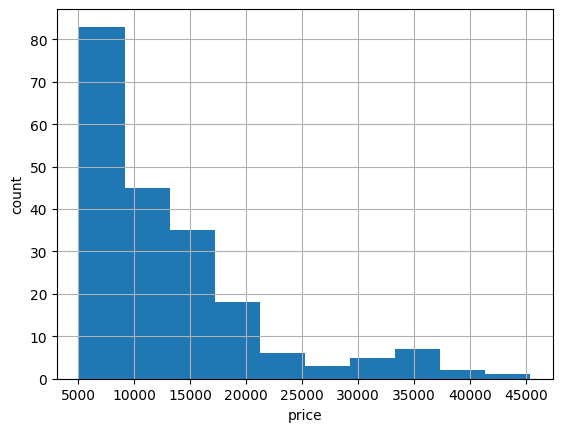

In [7]:
import matplotlib.pyplot as plt

#価格(price) についてヒストグラムを描く
plt.hist(input_data.price)
plt.xlabel('price')
plt.ylabel('count')
plt.grid(True)

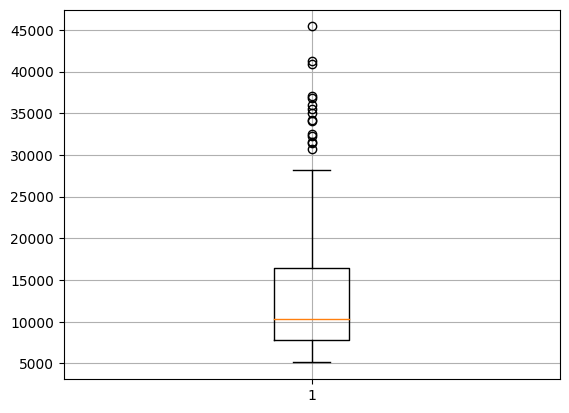

In [8]:
import matplotlib.pyplot as plt

#価格(price) についてひげ図を描く
plt.boxplot(input_data.price)
plt.grid(True)

4.5 変数間の関係性

Text(0.5, 0, 'Engine')

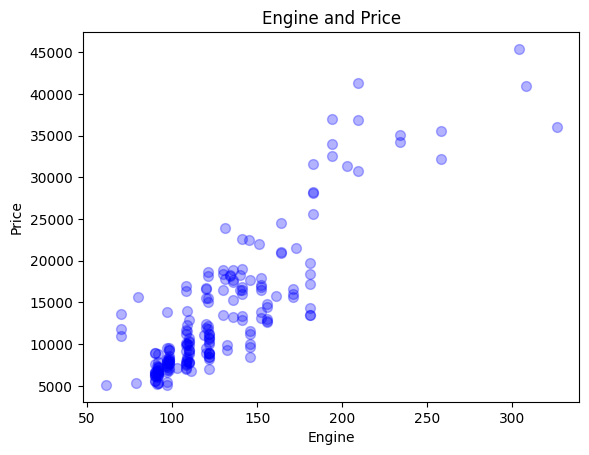

In [9]:
import matplotlib.pyplot as plt
import scipy.stats

plt.scatter(input_data.enginesize,input_data.price, s=50, c="blue", alpha=0.3, linewidths=1, edgecolors="blue")
plt.title('Engine and Price')
plt.ylabel('Price')
plt.xlabel('Engine')

In [10]:
import numpy as np
#共分散を導出する
print(np.cov(input_data.price, input_data.enginesize))
print(np.cov(input_data.price, input_data.enginesize).astype('int64'))
#相関行列を導出する
print(np.corrcoef(input_data.price, input_data.enginesize))

[[6.38217616e+07 2.90808158e+05]
 [2.90808158e+05 1.73411392e+03]]
[[63821761   290808]
 [  290808     1734]]
[[1.        0.8741448]
 [0.8741448 1.       ]]


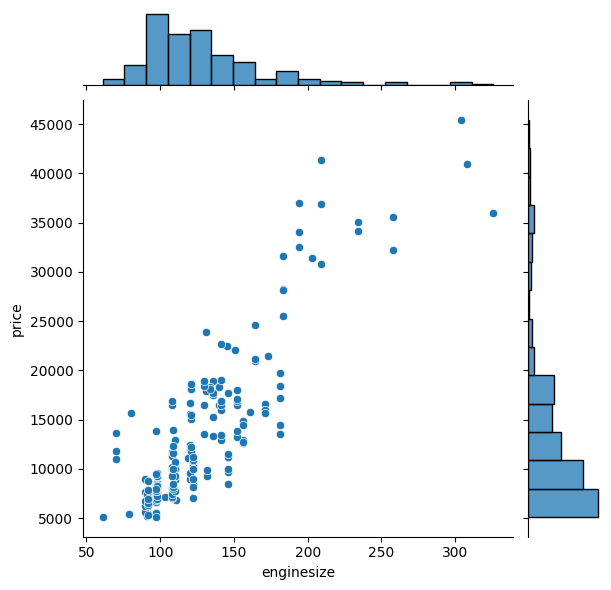

In [12]:
#散布図とヒストグラムを確認する
import seaborn as sns
#sns.jointplot(input_data.enginesize,input_data.price)
sns.jointplot(data=input_data,x='enginesize',y='price')

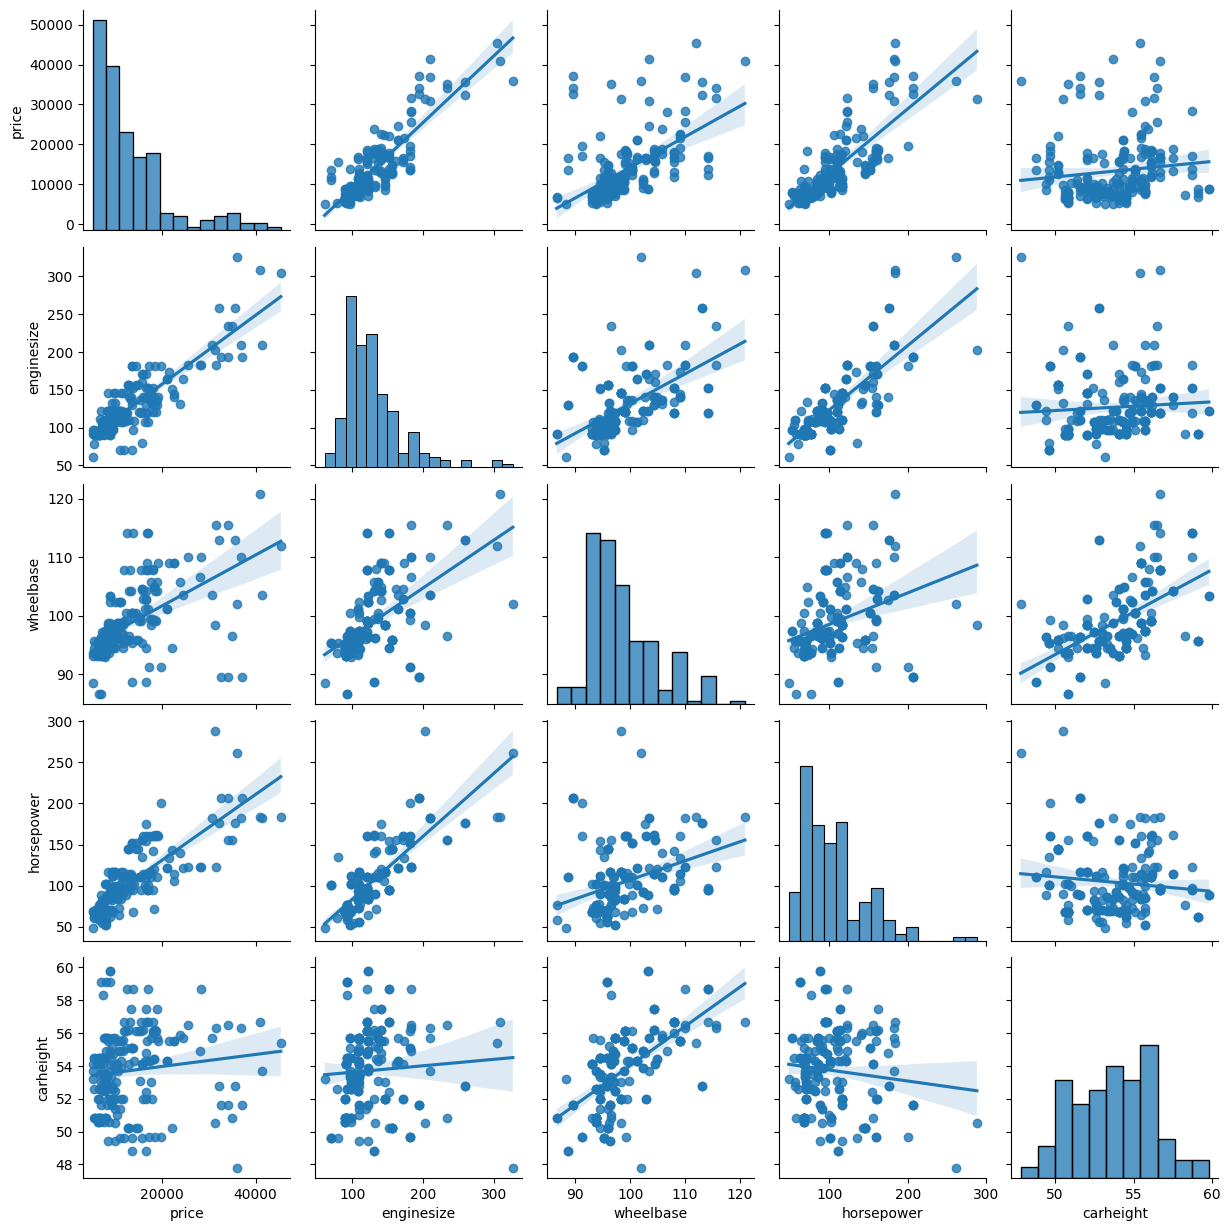

In [13]:
import numpy as np

#モデルで利用する変数を接合し, ひとつの DataFrame にする
#読み込むデータを変えれば, 説明変数や被説明変数を変えることが可能
x_list = pd.concat([input_data.price, input_data.enginesize,input_data.wheelbase, input_data.horsepower, input_data.carheight], axis=1)

#pairplotをプロットする
sns.pairplot(x_list, kind='reg')

<Axes: >

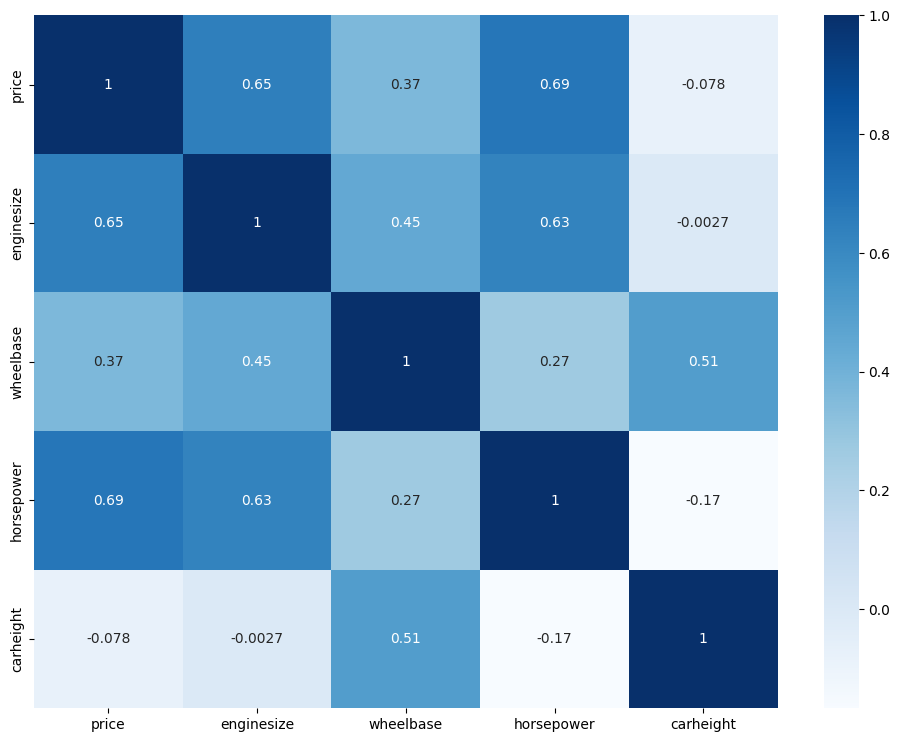

In [14]:
#相関係数をプロットする
plt.figure(figsize=(12, 9))
sns.heatmap(x_list.pct_change().corr(), annot=True, cmap='Blues')

4.6 作業結果を保存する

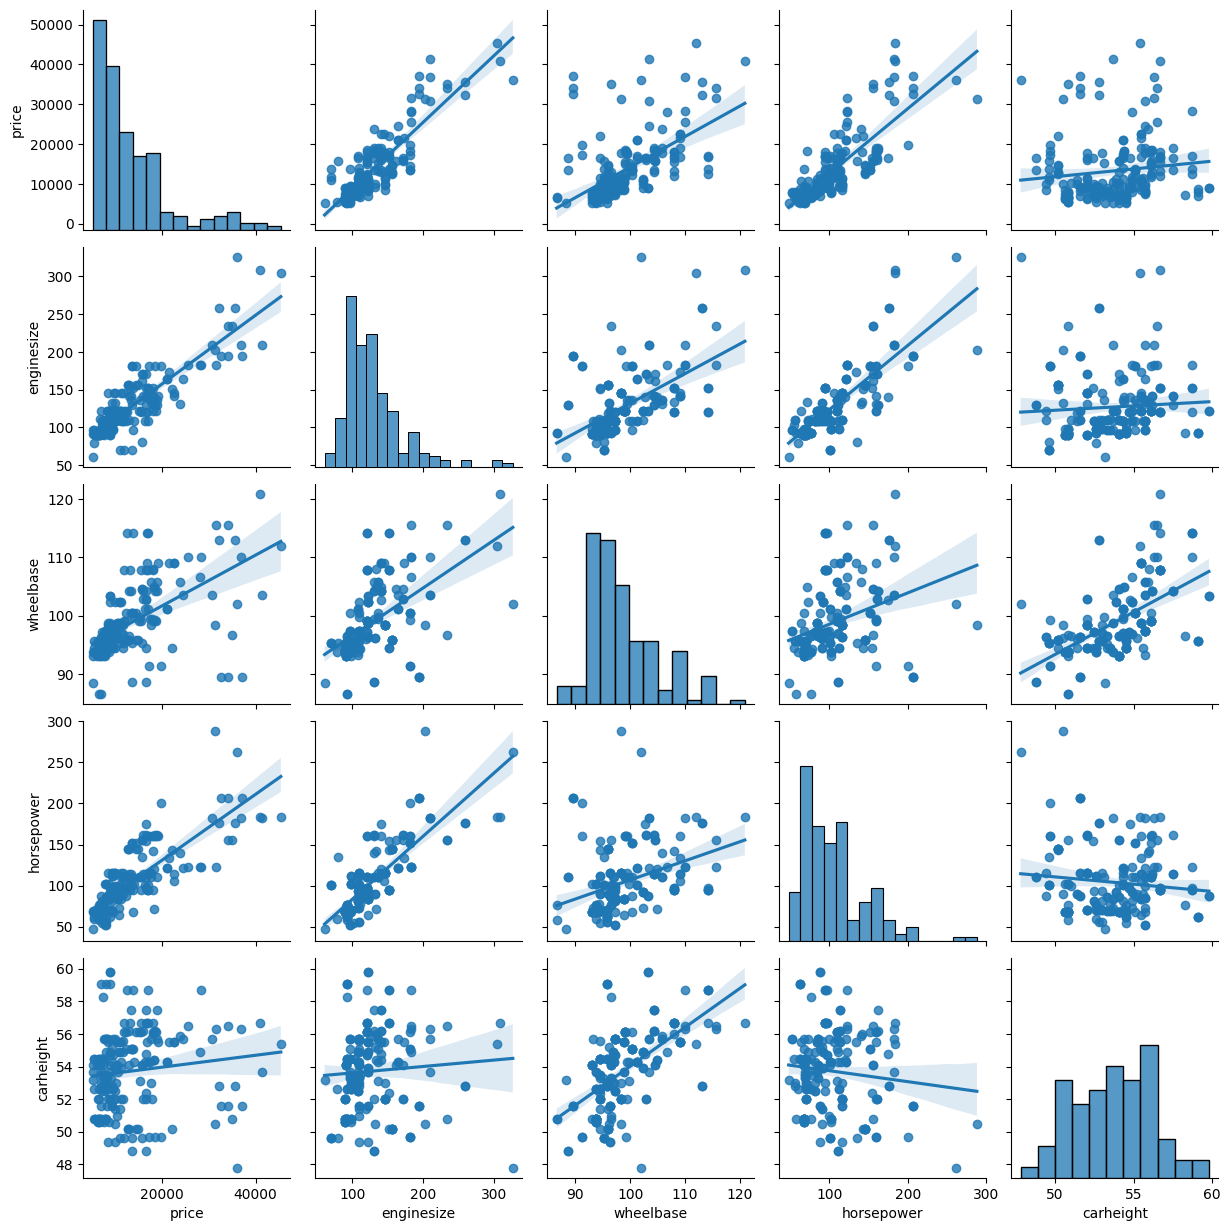

In [15]:
import numpy as np
import seaborn as sns

#ヒストグラムをプロットする
sns.pairplot(x_list, kind='reg').savefig('test.png')